In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Q1: Load all data and vectorize it with tf-idf vectorization.
df = pd.read_csv("songdata.csv", delimiter=",")
vect = TfidfVectorizer(min_df =20, stop_words = 'english')

X = vect.fit_transform(df['text'])
print("Q1: Tf-idf matrix:", X.shape)

Q1: Tf-idf matrix: (57650, 9823)


In [ ]:
#Q2: Apply a clustering algorithm with 3 clusters and find top 5 closest documents to each cluster’s centroid. 
#Analyze your result. 
from scipy.spatial import distance
kmeans = KMeans(3, random_state = 234, n_jobs = 2)
clusters = kmeans.fit_predict(X)

D = kmeans.transform(X)
print("Q2: ")
for i in range(3):
    order = D[:,i].argsort()[::]
    print(df['text'][order[:5]])

    
print("One thing that strike first after top 5 closest documents are printed is that all have same foreign song as closest.")
print("The main topic of first cluster is mostly about you got to beleive me, give me second chance.")
print("The main topic of second cluster is about people or you are saying something about you, has word baby a lot.")
print("The third cluster has all chorus with love.")

In [9]:
#Q3: Reduce the dimension to 50 components using LSA and report top 5 features per component. Analyze your result. 
lsa = TruncatedSVD(50)
Z = lsa.fit_transform(X)
print("Q3: Truncated SVD matrix: ", Z.shape)

vocab = np.array(vect.get_feature_names())

for i in range(Z.shape[1]):
    order = np.abs(lsa.components_[i].argsort())[::-1]
    print(vocab[order[:5]])
    
print("Q3: Because almost all songs are about love, the top 5 features of the components are all about love, too")
print("And number 50 for components does not give clear distinction among the components")
print("Mostly topics are around love, want, christmas, know, home, good, tonight, and tell.")

Q3: Truncated SVD matrix:  (57650, 50)
['love' 'don' 'know' 'll' 'just']
['love' 'heart' 'true' 'forever' 'need']
['oh' 'baby' 'yeah' 'want' 'ooh']
['oh' 'day' 'll' 'night' 'life']
['don' 'oh' 'want' 'know' 'need']
['ll' 'baby' 'let' 'come' 'heart']
['la' 'll' 'let' 'want' 'baby']
['want' 'yeah' 'let' 'come' 'christmas']
['ll' 'yeah' 'gonna' 'let' 'know']
['let' 'don' 'come' 'like' 'wanna']
['got' 'let' 've' 'want' 'gonna']
['yeah' 've' 'let' 'know' 'heart']
['gonna' 'yeah' 'time' 'away' 'way']
['christmas' 'don' 'come' 'got' 'home']
['christmas' 'time' 'just' 'let' 'girl']
['know' 'christmas' 'chorus' 'gonna' 'lord']
['come' 'hey' 'know' 'girl' 'home']
['come' 'like' 'feel' 'home' 'know']
['chorus' 'time' 'come' 'say' 'ain']
['know' 'man' 'let' 'good' 'time']
['hey' 'like' 'feel' 'way' 'christmas']
['time' 'hey' 'don' 'heart' 'world']
['life' 'need' 'world' 'wanna' 'believe']
['night' 'need' 'tonight' 'wanna' 'right']
['wanna' 'say' 'heart' 'tell' 'night']
['say' 'night' 'tonight' 'ne

In [ ]:
#Q4: Run a clustering algorithm with 2-10 clusters on low dimension features and select the best number of clusters using elbow 
#method. 
inertia = []

#vect = TfidfVectorizer(min_df = 20, stop_words = 'english')
#X = vect.fit_transform(df['text'])

#lsa = TruncatedSVD(50)
#Z = lsa.fit_transform(X)

for i in range(2, 10):
    kmeans = KMeans(i, n_jobs = 4)
    kmeans.fit_predict(Z)
    inertia.append(kmeans.inertia_)

print("Q4: Inertia", inertia)
plt.title("Kmeans cluster number vs Inertia")
plt.plot(range(2, 10), inertia)


In [11]:
#Q5: Use the best number of clusters that you have found and find top 5 closest documents to each cluster’s centroid. 
#Compare your result with Q2 
n = 5
kmeans = KMeans(n, random_state = 234, n_jobs = 2)
clusters = kmeans.fit_predict(Z)

print("Q5: From the elbow method graph, we see that inertia is decreasing as the k increases.")
print("But there is a slightly slower decrease at k=5, so I chose 5 as best number.")
print(kmeans.cluster_centers_.shape)
print("Top documents per cluster:")

D = kmeans.transform(Z)

for i in range(n):
    order = D[:,i].argsort()[::]
    print(df['text'][order[:5]])

print("Compared to Q2 clusters, there is no foreign songs near to cluster centers.")
print("The songs are completely different from Q2 cluster songs.")
print("The fifth cluster is all about can't have you any more.")

Q5: From the elbow method graph, we see that inertia is decreasing as the k increases.
But there is a slightly slower decrease at k=5, so I chose 5 as best number.
(5, 50)
Top documents per cluster:
16404    You should never underestimate the power of  \...
21238    As I walk through the valley where I harvest m...
32918    L. Ron Hoover:  \nWelcome to the First Church ...
37918    [Alan Jackson]  \nThe sun is hot and that old ...
29200    If you're in the right city at the right time ...
Name: text, dtype: object
8546     The sun rises and sets on time every day of th...
36207    Settle down, class  \nNow you've passed  \nYou...
55419    Reuben James in my song you'll live again  \nA...
36986    If magic is all we've ever know  \nThen it's e...
3046     It was in ancient history, four thousand B.C. ...
Name: text, dtype: object
586      Oh-oh  \n  \nWalking in the midnight rain  \nT...
36373    (mick, I've got a...)  \nThere must be one mil...
44871    (Written by J. Livingston and R.

Q6: Ignoring the colors, clusters seems to be parts of one big cluster.
But analyzing further, the first cluster is centered at the origin having diamond shape.
The upper cluster is a little further from center and spread upwards, having straight base.
The bottom cluster is further from center almost like horizontal spread to the right.


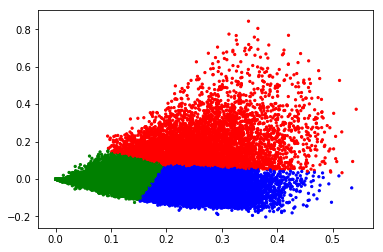

In [12]:
#Q6: Reduce dimension to 2 components and find 3 clusters in data and plot them using a scatter plot with different colors. 
#Analyze your result.

#vect = TfidfVectorizer(min_df = 30, stop_words = 'english')
#X = vect.fit_transform(df['text'])

colors = np.array(['r', 'g', 'b'])
lsa = TruncatedSVD(2)
Z = lsa.fit_transform(X)

kmeans = KMeans(3, init = 'random')
clusters = kmeans.fit_predict(Z)
plt.scatter(Z[:, 0], Z[:, 1], 5, colors[clusters])

print("Q6: Ignoring the colors, clusters seems to be parts of one big cluster.")
print("But analyzing further, the first cluster is centered at the origin having diamond shape.")
print("The upper cluster is a little further from center and spread upwards, having straight base.")
print("The bottom cluster is further from center almost like horizontal spread to the right.")